<a href="https://colab.research.google.com/github/kritikaiyeer/image-classifier-cnn/blob/master/DogORCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
os.environ['KAGGLE_USERNAME'] ="krithikaiyer" #username
os.environ['KAGGLE_KEY'] = "be5107dc1ef5a94cb5855ec93dfa070b" #API Key
!kaggle competitions download -c dogs-vs-cats #api copied from kaggle

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 26.6MB/s]
 99% 537M/543M [00:13<00:00, 47.5MB/s]
100% 543M/543M [00:13<00:00, 42.3MB/s]
 98% 265M/271M [00:03<00:00, 44.8MB/s]
100% 271M/271M [00:03<00:00, 76.2MB/s]


In [7]:
#Upload data
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
 data_dir_list = os.listdir('/content/train')
 #print(data_dir_list)

 path, dirs, files = next(os.walk("/content/train"))
 file_count = len(files)
 print(file_count)

 original_dataset_dir = '/content/train'
 base_dir = '/content/cats_and_dogs_small'
 os.mkdir(base_dir)

25000


In [9]:
#Create Seperate folder for classifying Images

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)




In [10]:
import shutil

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)




In [11]:
print('total training cat images', len(os.listdir(train_cats_dir)))
print('total validation cat images', len(os.listdir(validation_cats_dir)))
print('total testing cat images', len(os.listdir(test_cats_dir)))

print('total training dog images', len(os.listdir(train_dogs_dir)))
print('total validation dog images', len(os.listdir(validation_dogs_dir)))
print('total testing dog images', len(os.listdir(test_dogs_dir)))

total training cat images 1000
total validation cat images 500
total testing cat images 500
total training dog images 1000
total validation dog images 500
total testing dog images 500


In [12]:
from keras import  layers
from keras import  models

#Create Model
model = models.Sequential()

#Add Layers
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [13]:
# Compile Model
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [14]:
#ImageDataGenerator to feed Images to network from drive in suitable format
# Train Model

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
#Fit the model to data using generator

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

model.save('cats_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 14s 136ms/step - loss: 0.6915 - acc: 0.5260 - val_loss: 0.6901 - val_acc: 0.4800
Epoch 2/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6576 - acc: 0.6175 - val_loss: 0.7456 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6171 - acc: 0.6595 - val_loss: 0.5665 - val_acc: 0.7100
Epoch 4/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5658 - acc: 0.6995 - val_loss: 0.6916 - val_acc: 0.5950
Epoch 5/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5381 - acc: 0.7245 - val_loss: 0.5531 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5121 - acc: 0.7470 - val_loss: 0.4266 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 8s 79ms/step - loss: 0.4769 - acc: 0.7690 - val_loss: 0.4832 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 8s 79ms/step 

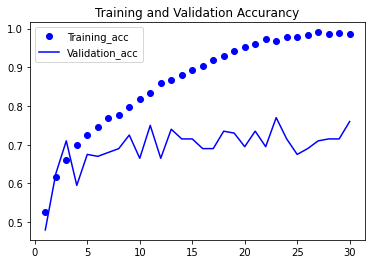

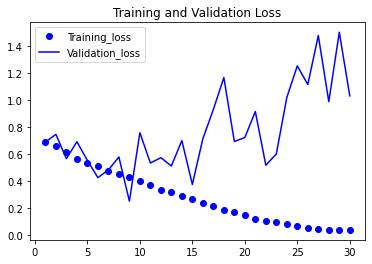

In [16]:
#plotting the points to check the validation and training accurancies

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,  acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation Accurancy')
plt.legend()

plt.figure()

plt.plot(epochs,  loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



In [17]:
#Since our validation graph and training graph is not aligned we will add dropout to fit and fit
#Create Model
model = models.Sequential()

#Add Layers
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [18]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 33s 332ms/step - loss: 0.6900 - acc: 0.5275 - val_loss: 0.6711 - val_acc: 0.5082
Epoch 2/20
100/100 [==============================] - 30s 298ms/step - loss: 0.6751 - acc: 0.5773 - val_loss: 0.6641 - val_acc: 0.5844
Epoch 3/20
100/100 [==============================] - 29s 294ms/step - loss: 0.6678 - acc: 0.5843 - val_loss: 0.6353 - val_acc: 0.6301
Epoch 4/20
100/100 [==============================] - 30s 303ms/step - loss: 0.6433 - acc: 0.6209 - val_loss: 0.6334 - val_acc: 0.6231
Epoch 5/20
100/100 [==============================] - 29s 286ms/step - loss: 0.6345 - acc: 0.6360 - val_loss: 0.6722 - val_acc: 0.6491
Epoch 6/20
100/100 [==============================] - 31s 315ms/step - loss: 0.6212 - acc: 0.6445 - val_loss: 0.8176 - val_acc: 0.5483
Epoch 7/20
100/100 [==============================] - 30s 296ms/step - loss: 0.6013 - acc: 0.6732 - val_lo

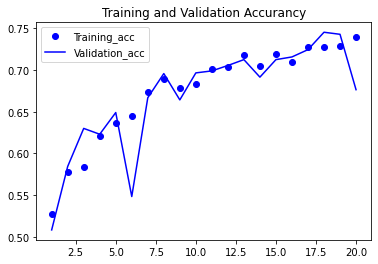

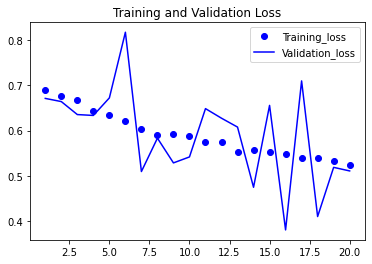

In [19]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,  acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation Accurancy')
plt.legend()

plt.figure()

plt.plot(epochs,  loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()